In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import os
path = 'mobility/'
csv_files = os.listdir(path)
csv_files

['CHL.csv',
 'COL.csv',
 'GRC.csv',
 'ITA.csv',
 'MEX.csv',
 'PAN.csv',
 'TUR.csv',
 'USA.csv']

In [22]:
df = pd.read_csv(path + csv_files[0])
df[['Mean_distance_avg', 'Mean_distance_avg_14day_movavg']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Mean_distance_avg               1595 non-null   float64
 1   Mean_distance_avg_14day_movavg  1624 non-null   float64
dtypes: float64(2)
memory usage: 25.7 KB


In [23]:
df.tail()

,Date,Sample_size,Mean_distance_p5,Mean_distance_avg,Mean_distance_p95,Mean_distance_p5_7day_movavg,Mean_distance_avg_7day_movavg,Mean_distance_p95_7day_movavg,Mean_distance_p5_14day_movavg,Mean_distance_avg_14day_movavg,...,At_home_p95_7day_movavg,At_home_p5_14day_movavg,At_home_avg_14day_movavg,At_home_p95_14day_movavg,At_home_p5_21day_movavg,At_home_avg_21day_movavg,At_home_p95_21day_movavg,At_home_p5_28day_movavg,At_home_avg_28day_movavg,At_home_p95_28day_movavg
1632,2024-08-29,94731.0,25.22,26.21,27.52,25.84,26.13,26.50,24.91,25.10,...,22.23,26.60,26.70,26.81,27.11,27.20,27.29,27.78,27.86,27.94
1633,2024-08-30,95964.0,27.83,28.55,29.23,26.65,26.94,27.27,25.28,25.47,...,21.80,25.73,25.83,25.94,27.12,27.21,27.31,27.27,27.35,27.43
1634,2024-08-31,101191.0,24.85,25.76,27.13,26.34,26.64,27.02,25.64,25.84,...,22.81,24.94,25.04,25.15,26.77,26.86,26.95,26.87,26.95,27.03
1635,2024-09-01,94711.0,21.09,21.85,22.64,25.39,25.68,26.05,25.49,25.68,...,25.40,24.34,24.45,24.56,26.82,26.91,27.00,26.67,26.75,26.83
1636,2024-09-02,100838.0,25.72,26.61,27.77,25.54,25.84,26.21,25.51,25.71,...,24.69,24.07,24.17,24.28,26.67,26.76,26.85,26.42,26.50,26.58


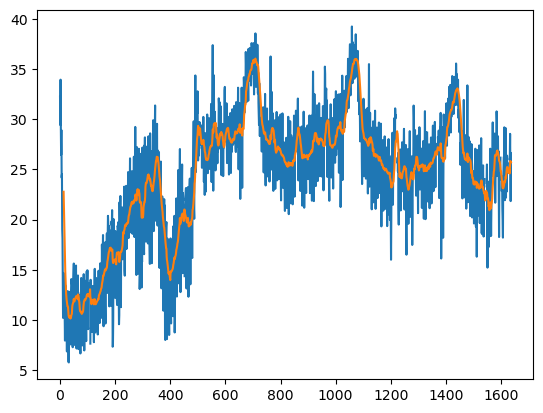

In [24]:
plt.plot(df[['Mean_distance_avg', 'Mean_distance_avg_14day_movavg']])

In [25]:
df_full = pd.DataFrame()

for file in csv_files:
    country_name = file.split(".")[0]
    df_temp = pd.read_csv(path + file)
    df_temp = df_temp[['Date', 'Mean_distance_avg_14day_movavg']]
    df_temp['country'] = country_name
    df_full = pd.concat([df_full, df_temp], ignore_index=True)

In [26]:
df_full

,Date,Mean_distance_avg_14day_movavg,country
0,2020-03-11,NaN,CHL
1,2020-03-12,NaN,CHL
2,2020-03-13,NaN,CHL
3,2020-03-14,NaN,CHL
4,2020-03-15,NaN,CHL
...,...,...,...
13091,2024-08-29,57.90,USA
13092,2024-08-30,58.12,USA
13093,2024-08-31,58.25,USA
13094,2024-09-01,59.02,USA


In [27]:
df_full.dropna(inplace = True)

In [28]:
df_full.to_csv('silver/mobility_index.csv', index = False)

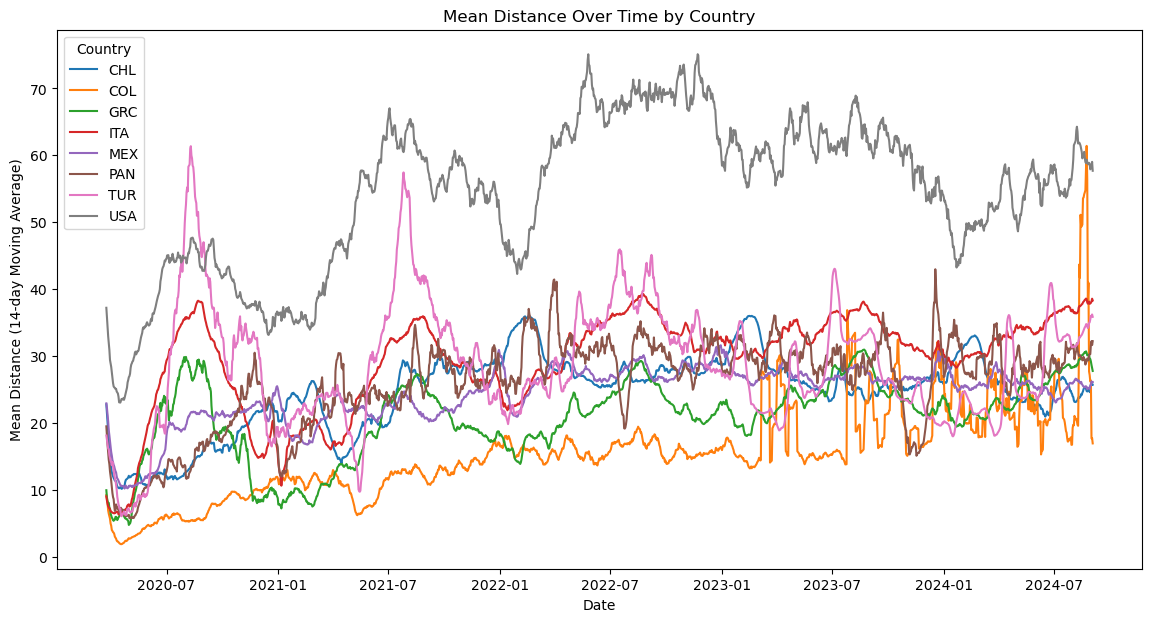

In [29]:
# Convert 'Date' column to datetime if it's not already
df_full['Date'] = pd.to_datetime(df_full['Date'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_full, x='Date', y='Mean_distance_avg_14day_movavg', hue='country')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Mean Distance (14-day Moving Average)')
plt.title('Mean Distance Over Time by Country')
plt.legend(title='Country')
plt.show()